## Credit Card Fraud Detection

In [52]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [53]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt
from time import time
sns.set_style("ticks")

In [54]:
train=pd.read_csv(r'../input/creditcardfraud/creditcard.csv')

In [55]:
train.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [56]:
def time_convert(my_seconds):
    return(dt.datetime(1970,1,1) + dt.timedelta(seconds=my_seconds))

In [57]:
train['Time'] = train['Time'].apply(time_convert)

In [58]:
train.set_index('Time',inplace=True)

In [59]:
train_corr = train.corr()

In [60]:
train['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [61]:
amt_by_time = train.loc[:,['Amount']]
amt_by_time = amt_by_time[train.Class == 1]

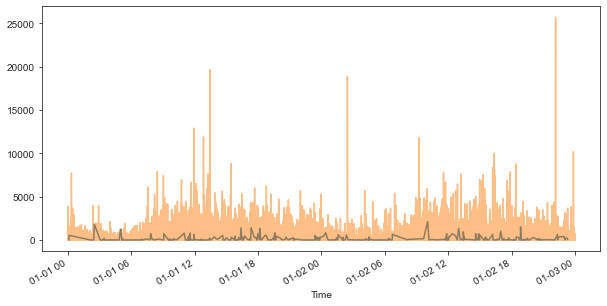

In [62]:
amt_by_time['Amount'].plot()
train['Amount'].plot(alpha=.5,figsize=(10,5))

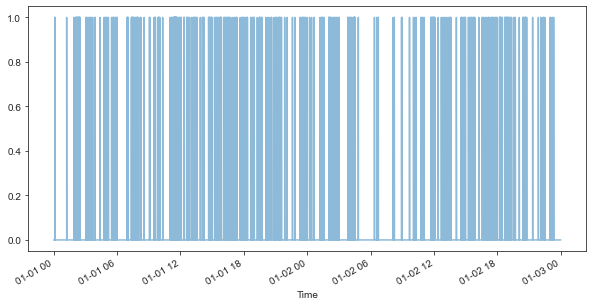

In [63]:
#amt_by_time['Amount'].plot()
train['Class'].plot(alpha=.5,figsize=(10,5))

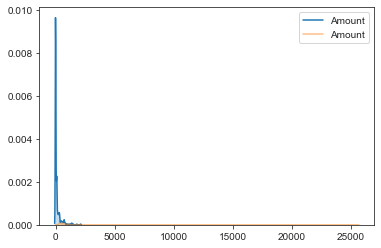

In [64]:
sns.kdeplot(amt_by_time['Amount'], shade=True)
sns.kdeplot(train['Amount'], shade=True,alpha =.5)

In [65]:
train['Amount'].describe()

count    284807.000000
mean         88.349619
std         250.120109
min           0.000000
25%           5.600000
50%          22.000000
75%          77.165000
max       25691.160000
Name: Amount, dtype: float64

In [66]:
amt_by_time['Amount'].describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [67]:
train_fraud = train[train['Class']==1]
train_fraud

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
Time,,,,,,,,,,,,,,,,,,,,,
1970-01-01 00:06:46,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,-2.772272,...,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,0.00,1
1970-01-01 00:07:52,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,-0.838587,...,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,529.00,1
1970-01-01 01:14:22,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.075788,0.562320,-0.399147,-0.238253,-1.525412,...,-0.294166,-0.932391,0.172726,-0.087330,-0.156114,-0.542628,0.039566,-0.153029,239.93,1
1970-01-01 01:56:26,-4.397974,1.358367,-2.592844,2.679787,-1.128131,-1.706536,-3.496197,-0.248778,-0.247768,-4.801637,...,0.573574,0.176968,-0.436207,-0.053502,0.252405,-0.657488,-0.827136,0.849573,59.00,1
1970-01-01 02:05:19,1.234235,3.019740,-4.304597,4.732795,3.624201,-1.357746,1.713445,-0.496358,-1.282858,-2.447469,...,-0.379068,-0.704181,-0.656805,-1.632653,1.488901,0.566797,-0.010016,0.146793,1.00,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1970-01-02 22:59:02,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,-5.587794,...,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00,1
1970-01-02 23:02:27,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,-3.232153,...,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76,1
1970-01-02 23:02:31,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,-3.463891,...,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89,1


In [68]:
train_fraud.shape

(492, 30)

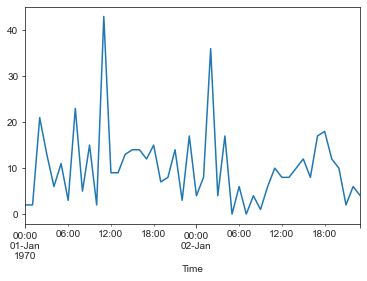

In [69]:
train_fraud.resample('H').Class.sum().plot()

In [70]:
# https://www.youtube.com/watch?v=OJedgzdipC0

In [71]:
train_mod = train.drop(columns='Class')
label = train['Class']

In [72]:
from sklearn.model_selection import train_test_split

In [73]:
X_train, X_test, y_train , y_test = \
train_test_split(train_mod, label, test_size=.2,random_state=11)

In [74]:
from imblearn.combine import SMOTETomek

In [75]:
smt = SMOTETomek(random_state=11)
X_new, y_new = smt.fit_resample(X_train, y_train)

In [94]:
X_new.shape

(454922, 17)

In [83]:
y_new.value_counts()

1    227461
0    227461
Name: Class, dtype: int64

### Correlations

In [96]:
X_new_corr = X_new.corr()

V7 3
3 1 7 :  1 10/70
6 7
keep9
drop 1,3,5,7,10

In [87]:
X_new.drop(columns=['V1','V3','V5','V7','V10'],inplace=True)

In [89]:
X_new.drop(columns=['V2','V4'],inplace=True)

In [92]:
X_new.drop(columns=['V12','V14','V16','V17','V18'],inplace=True)

In [95]:
X_new.drop(columns=['V9','V19'],inplace=True)